# An Introduction to Machine Learning with Decision Tree

In the `Python` lab we explored how to use a Naïve Bayes classifier to predict species of iris. For this lab, the task is the same but the method is different. Instead of using Naïve Bayes\* for classification, we will be using a method called Decision Tree. 

This is a good time to mention that both the methods that we are using for this week are generally used to predict discrete targets\*\*. Therefore, if we want to predict a target that is continuous, we have to discretize the target (or use another algorithm). We are going to go ahead and continue working with the iris dataset so we needn't worry about discretizing the target variable `Species` because it already is discrete.

\* *Don't worry. We will cover Naïve Bayes in `R` during the practice exercise.* 

\*\* *There is a form of Decision Tree called Regression Tree that works well for a continuous target.*

### Iris data

By this point, we should be very familiar with the `iris` dataset, but we'll go ahead and call `head()` on it again just to take a look at it.

In [1]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


Now we need to read in the packages that we will be using for this lab. `R` has quite a big development community and because of that there are several packages that implement decision trees. For today, we will be using the `tree` package, but don't be surprised if you see other packages like `rpart` or packages that compile many machine learning packages into one place, like `mlr`. 

In [2]:
library(tree)
library(ggplot2)

In `R`, our predictions problems often take on the following syntax:

```splus
target ~ var1 + var2 + var3 
```

This tells `R` to predict the `target` by using the inputs of `var1`, `var2` and `var3`. We will call this `frmla` (shorthand for "formula") so we could use it for multiple algorithms if we desire.

In [3]:
frmla <- Species ~ Sepal.Length + Sepal.Width + Petal.Length + Petal.Width 

Notice how we are only specifying the variable name and not the data. This is intentional and is a measure taken to further modularize our code. This will be further explained was to why we do this in the practice. For now, just keep in mind that we will be using this formula in more than one place for more than one data set and therefore it is appropriate to assign it to an object. 

### Creating the Tree

There wasn't really any data carpentry needed this time around. This is because `R` comes with `iris` in a format that is already easily interpreted. That being said, we can go ahead and create our decision tree model. To do this in the `tree` package, it is as simple as calling the `tree` function on our formula and then specifying the data. We'll go ahead and do this now and we will call this model `tr`.

In [4]:
tr <- tree(frmla, data = iris)

There we have it...but again, we have yet to do anything interesting. Well first call a `summary` on the tr object. This will produce some output that will allow us to assess the tree model.

In [6]:
summary(tr)


Classification tree:
tree(formula = frmla, data = iris)
Variables actually used in tree construction:
[1] "Petal.Length" "Petal.Width"  "Sepal.Length"
Number of terminal nodes:  6 
Residual mean deviance:  0.1253 = 18.05 / 144 
Misclassification error rate: 0.02667 = 4 / 150 

There are several bits of information reported in this summary, but we want to focus on the "Number of Terminal Nodes" and the “Misclassification Error Rate”. 

“The Number of Terminal Nodes” is the number of endpoints used to make the classification. These decisions are made by a recursive procedure. If every observation in that node belongs to the same class or if the number of observations in that node is very small then that node becomes a terminal node. However, if the number of observations in a node is large and contains multiple classes then it will find the best rule from **one** feature to split the data on. This algorithm repeats on these new nodes until they become terminal nodes. Therefore, the numbers of decisions that are used to split the data are the number of terminal nodes minus 1. We can visualize our tree for a better representation of this. 

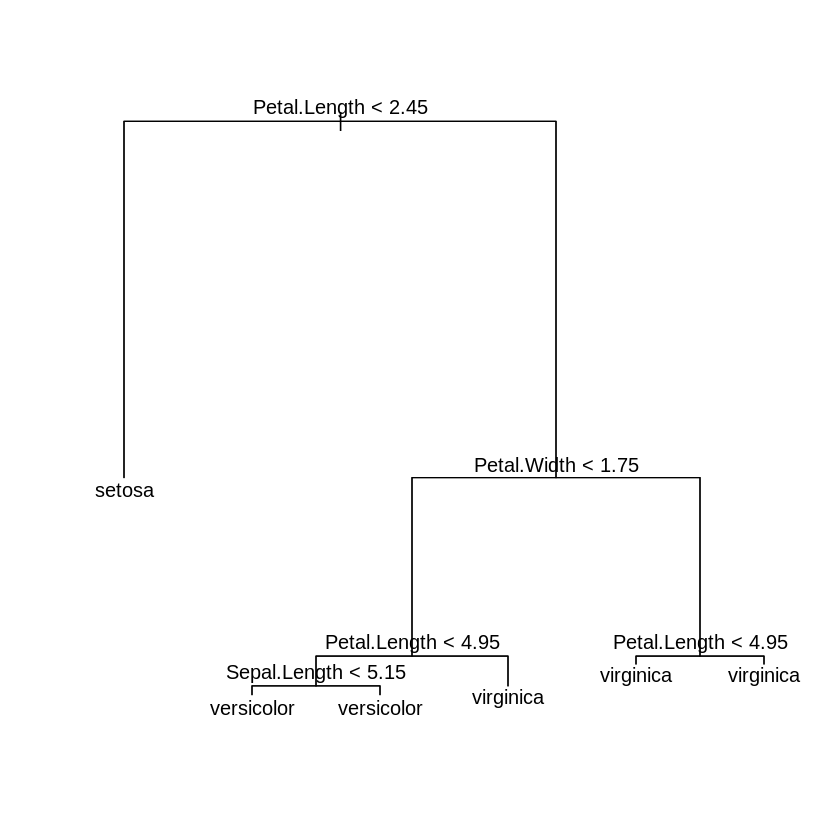

In [7]:
plot(tr)
text(tr)

The `plot()` function, in this case is going to plot the tree and then calling `text()` will overlay the text so we can see how the tree made its decisions.

The decision tree makes decisions from the top to the bottom. The bottom nodes are the terminal nodes. The first decision is made of a split in `Petal.Length`. If the petal length is less than 2.45, then we can go ahead and classify those as “setosa”. But if it is greater than 2.45 then we still have some splitting in order to get to our final decisions. That is what tree is showing. 

We can also create our own representation. Here is the rendition that I created in order to demonstrate how decisions are made. 

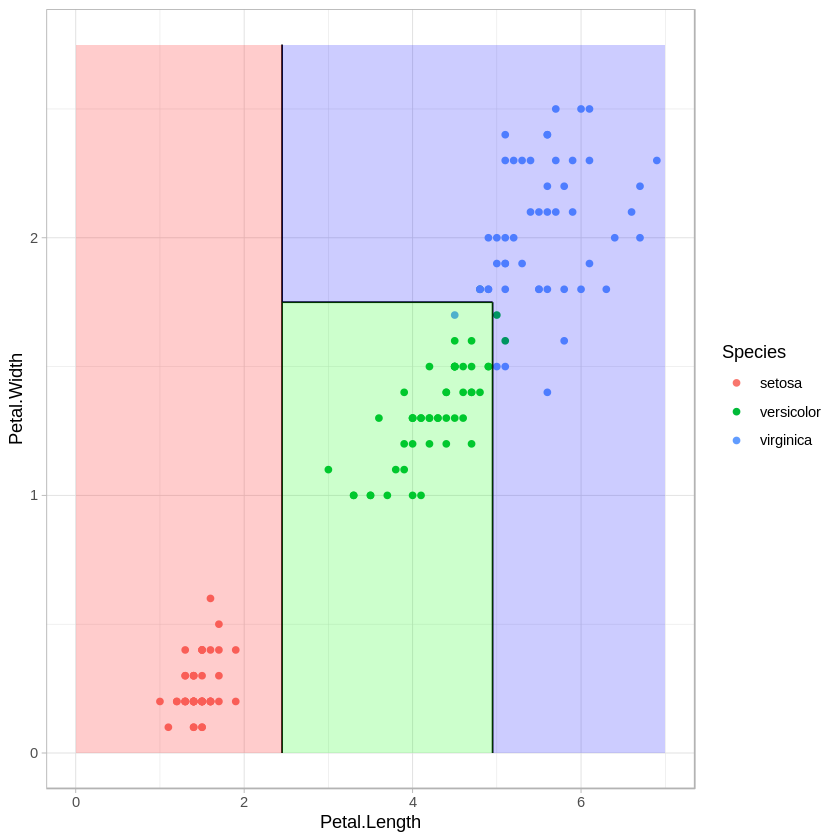

In [8]:
graph <- ggplot(data=iris, aes(Petal.Length, Petal.Width, colour=Species)) + geom_point()
graph + annotate("segment", x = 2.45, xend = 2.45, y = 0, yend = 2.75) +
        annotate("rect", xmin = 0, xmax = 2.45, ymin = 0, ymax = 2.75,
            alpha = .2, fill = 'red') + 
        annotate("segment", x = 2.45, xend = 4.95, y = 1.75, yend = 1.75) +
        annotate("rect", xmin = 2.45, xmax = 7, ymin = 1.75, ymax = 2.75,
            alpha = .2, fill = 'blue') +
        annotate("segment", x = 4.95, xend = 4.95, y = 0, yend = 1.75) + 
        annotate("rect", xmin = 2.45, xmax = 4.95, ymin = 0, ymax = 1.75,
            alpha = .2, fill = 'green') +
        annotate("rect", xmin = 4.95, xmax = 7, ymin = 0, ymax = 1.75,
            alpha = .2, fill = 'blue') + theme_light()

Notice the three variables in this plot - Petal.Length and Petal.Width for the x and y input variables, with the target Species indicated by color. The reason we chose those two input variables is because the majority of the decisions are made using them. I then used the splits to create line segments in the plot to show where the partitions were made and used shading of regions to demonstrate how points would then be classified if they fell into those regions. 

You will notice that most points are classified properly but there are a few “virginica” that fall in the “versicolor” boundary and vice versa. Can you find those points on the plot? They are the ones that are either blue in the green shaded region, or green in the blue shaded region. 

Now...can we find those points that were misclassified? Of course, we can! First, we will create a subset of the data **without** the target variable. We will use this subset to predict the targets based on the model that we trained. Yes, yes, this is the same data and we will cover how to handle this properly in the practices.

In [9]:
sub<-subset(iris, select = c(Sepal.Length, Sepal.Width,Petal.Length, Petal.Width))

In [10]:
predict(tr,sub, type = 'class')

[1] setosa     setosa     setosa     setosa     setosa     setosa    
  [7] setosa     setosa     setosa     setosa     setosa     setosa    
 [13] setosa     setosa     setosa     setosa     setosa     setosa    
 [19] setosa     setosa     setosa     setosa     setosa     setosa    
 [25] setosa     setosa     setosa     setosa     setosa     setosa    
 [31] setosa     setosa     setosa     setosa     setosa     setosa    
 [37] setosa     setosa     setosa     setosa     setosa     setosa    
 [43] setosa     setosa     setosa     setosa     setosa     setosa    
 [49] setosa     setosa     versicolor versicolor versicolor versicolor
 [55] versicolor versicolor versicolor versicolor versicolor versicolor
 [61] versicolor versicolor versicolor versicolor versicolor versicolor
 [67] versicolor versicolor versicolor versicolor virginica  versicolor
 [73] versicolor versicolor versicolor versicolor versicolor virginica 
 [79] versicolor versicolor versicolor versicolor versicolor virginica 
 [85] versicolor versicolor versicolor versicolor versicolor versicolor
 [91] versicolor versicolor versicolor versicolor versicolor versicolor
 [97] versicolor versicolor versicolor versicolor virginica  virginica 
[103] virginica  virginica  virginica  virginica  versicolor virginica 
[109] virginica  virginica  virginica  virginica  virginica  virginica 
[115] virginica  virginica  virginica  virginica  virginica  virginica 
[121] virginica  virginica  virginica  virginica  virginica  virginica 
[127] virginica  virginica  virginica  virginica  virginica  virginica 
[133] virginica  virginica  virginica  virginica  virginica  virginica 
[139] virginica  virginica  virginica  virginica  virginica  virginica 
[145] virginica  virginica  virginica  virginica  virginica  virginica 
Levels: setosa versicolor virginica

Okay, so we now have the predicted species for our data. We can now turn this into a data frame column and append it to our data frame. 

In [11]:
sub$Species <- iris$Species # be sure to add the species to our subset now since we didn't have it before 
sub$pred <- predict(tr,sub, type = 'class') # predicted classes

head(sub)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,pred
<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
5.1,3.5,1.4,0.2,setosa,setosa
4.9,3.0,1.4,0.2,setosa,setosa
4.7,3.2,1.3,0.2,setosa,setosa
4.6,3.1,1.5,0.2,setosa,setosa
5.0,3.6,1.4,0.2,setosa,setosa
5.4,3.9,1.7,0.4,setosa,setosa


The only thing left to do is find those misclassified points. If we did everything correctly then we know that there should only be four because that is what our misclassified rate was above. We will go ahead and find those misclassified points now.

In [12]:
miss <- sub[sub$Species != sub$pred,]

miss

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,pred
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
71,5.9,3.2,4.8,1.8,versicolor,virginica
78,6.7,3.0,5.0,1.7,versicolor,virginica
84,6.0,2.7,5.1,1.6,versicolor,virginica
107,4.9,2.5,4.5,1.7,virginica,versicolor


There we have it! 

# Save your noteboot, then `File > Close and Halt`